# MEAN SHIFT

In [18]:
# Imports
%matplotlib inline

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import json

In [19]:
# Opening json version
with open('./results/data_ms.json', 'r') as file:
    data = json.load(file)

In [20]:
data_df = pd.DataFrame(data)

# Saving latex version
data_df.to_latex('./latex/MeanShift/data_ms.tex', index=False)

In [21]:
# Retrieving the best and the worst configurations for each PCA dimension based on the rand index
best_data = []
worst_data = []
for i in range(len(data)):
    best = max(data[i]['outcomes'], key = lambda x: x['rand_index'])
    worst = min(data[i]['outcomes'], key = lambda x: x['rand_index'])
    best_data.append({
        'PCA': data[i]['PCA'],
        'width': best['width'],
        'n_clusters': best['n_clusters'],
        'rand_index': best['rand_index'],
        'fit_time': best['fit_time'],
        'predict_time': best['predict_time'],
    })
    worst_data.append({
        'PCA': data[i]['PCA'],
        'width': worst['width'],
        'n_clusters': worst['n_clusters'],
        'rand_index': worst['rand_index'],
        'fit_time': worst['fit_time'],
        'predict_time': worst['predict_time'],
    })

In [22]:
# Transforming lists into DataFrames and obtaining the latex version 
best_df = pd.DataFrame(best_data)
best_df.to_latex('./latex/MeanShift/best_data_ms.tex', index=False)
best_df

,PCA,width,n_clusters,rand_index,fit_time,predict_time
0,2,0.2,752,0.899545,20.726465,0.111947
1,12,2.0,4102,0.903594,80.168944,0.662323
2,22,2.0,10333,0.901745,14.331039,1.578656
3,32,2.0,11832,0.901128,13.471279,1.696847
4,42,2.0,12213,0.900817,15.529615,1.830008
5,52,2.0,12404,0.900486,15.267745,1.826886
6,62,5.0,1077,0.903654,103.697971,0.175156
7,72,5.0,1454,0.906010,105.771794,0.247195
8,82,5.0,1798,0.906893,111.291040,0.302584
9,92,5.0,2109,0.906865,131.851504,0.335757


In [23]:
# Transforming lists into DataFrames and obtaining the latex version 
worst_df = pd.DataFrame(worst_data)
worst_df.to_latex('./latex/MeanShift/worst_data_ms.tex', index=False)
worst_df

,PCA,width,n_clusters,rand_index,fit_time,predict_time
0,2,5,1,0.100227,12.279422,0.000000
1,12,5,1,0.100227,52.700547,0.000000
2,22,10,1,0.100227,30.154025,0.000000
3,32,10,1,0.100227,42.857116,0.000000
4,42,10,1,0.100227,56.068958,0.000000
5,52,10,1,0.100227,69.777131,0.000000
6,62,10,1,0.100227,82.335043,0.000000
7,72,10,1,0.100227,94.767410,0.000000
8,82,10,1,0.100227,106.799918,0.000000
9,92,10,1,0.100227,116.611817,0.015623


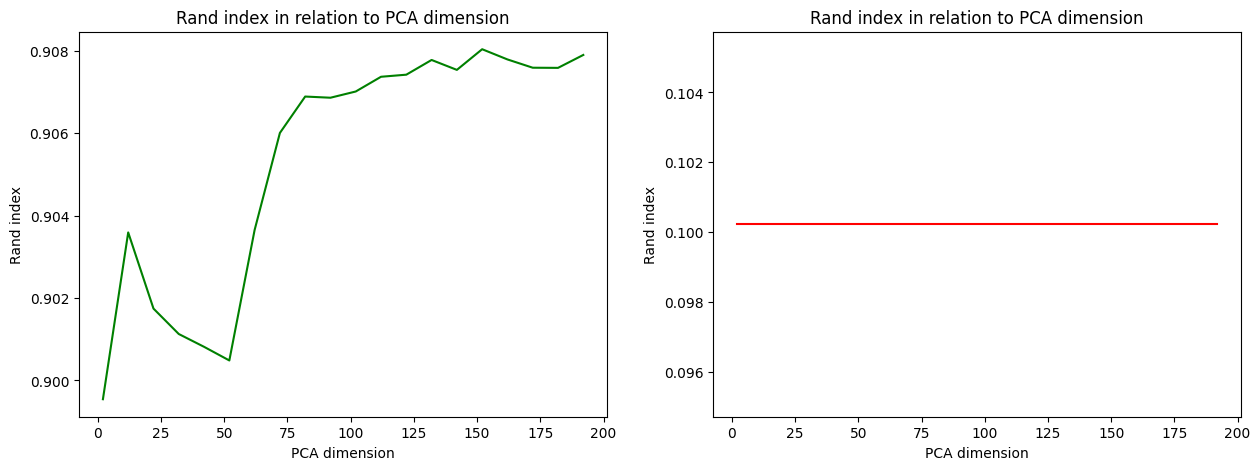

In [24]:
# Plot 'Rand index vs PCA dimension'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(best_df['PCA'], best_df['rand_index'], color = 'green')
ax[0].set_xlabel("PCA dimension") 
ax[0].set_ylabel("Rand index")  
ax[0].set_title("Rand index in relation to PCA dimension")  
ax[1].plot(worst_df['PCA'], worst_df['rand_index'], color = 'red')
ax[1].set_xlabel("PCA dimension")  
ax[1].set_ylabel("Rand index")  
ax[1].set_title("Rand index in relation to PCA dimension")  
plt.show()

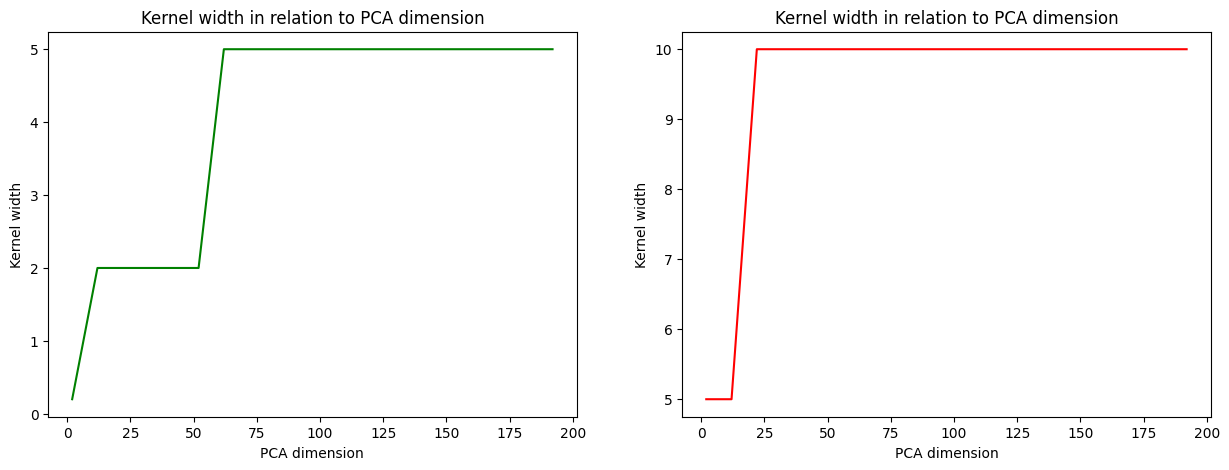

In [25]:
# Plot 'Kernel width vs PCA dimension'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(best_df['PCA'], best_df['width'], color = 'green')
ax[0].set_xlabel("PCA dimension") 
ax[0].set_ylabel("Kernel width")  
ax[0].set_title("Kernel width in relation to PCA dimension")  
ax[1].plot(worst_df['PCA'], worst_df['width'], color = 'red')
ax[1].set_xlabel("PCA dimension")  
ax[1].set_ylabel("Kernel width")  
ax[1].set_title("Kernel width in relation to PCA dimension")  
plt.show()

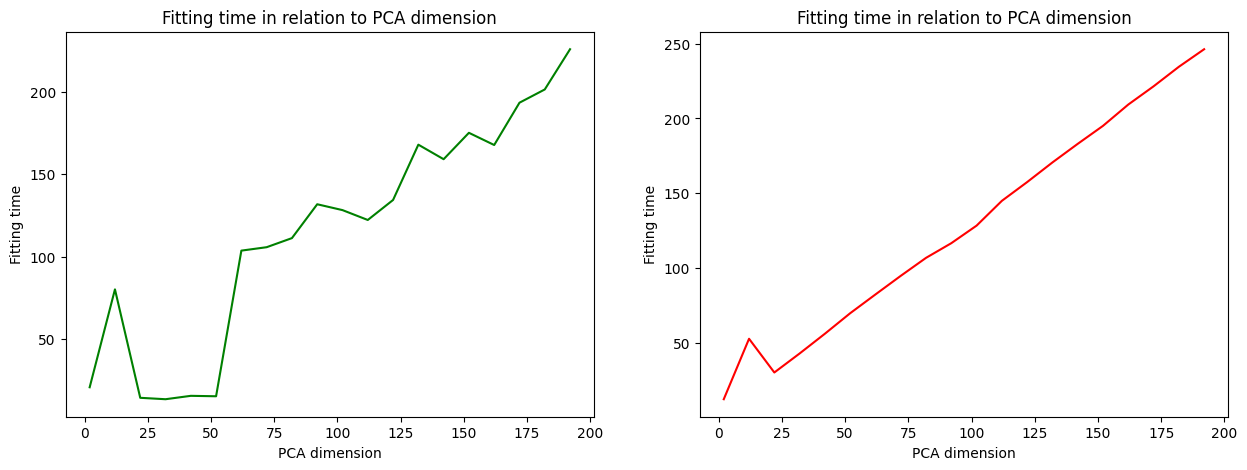

In [26]:
# Plot 'Fitting time vs PCA dimension'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(best_df['PCA'], best_df['fit_time'], color = 'green')
ax[0].set_xlabel("PCA dimension") 
ax[0].set_ylabel("Fitting time")  
ax[0].set_title("Fitting time in relation to PCA dimension")  
ax[1].plot(worst_df['PCA'], worst_df['fit_time'], color = 'red')
ax[1].set_xlabel("PCA dimension")  
ax[1].set_ylabel("Fitting time")  
ax[1].set_title("Fitting time in relation to PCA dimension")  
plt.show()

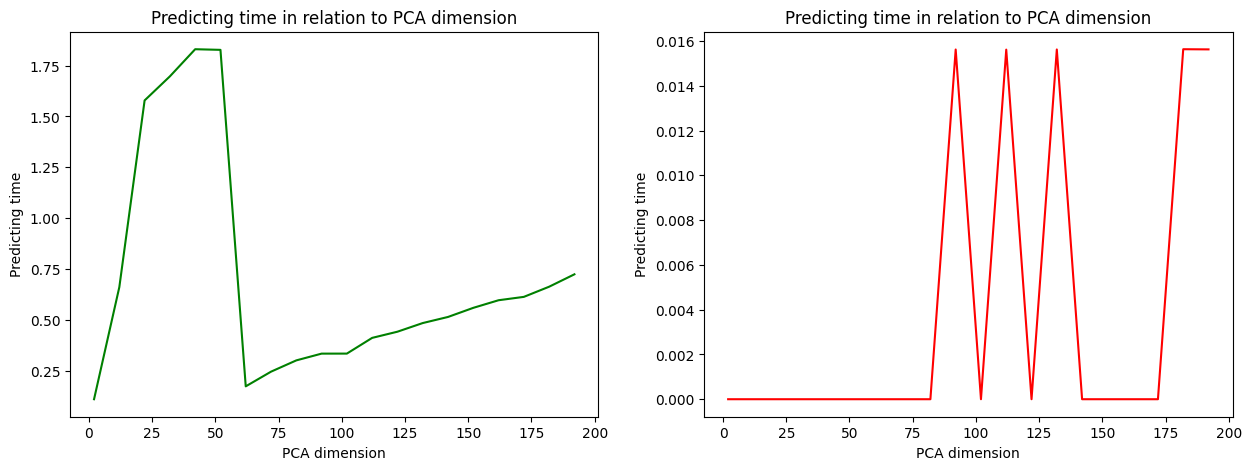

In [27]:
# Plot 'Predicting time vs PCA dimension'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(best_df['PCA'], best_df['predict_time'], color = 'green')
ax[0].set_xlabel("PCA dimension") 
ax[0].set_ylabel("Predicting time")  
ax[0].set_title("Predicting time in relation to PCA dimension")  
ax[1].plot(worst_df['PCA'], worst_df['predict_time'], color = 'red')
ax[1].set_xlabel("PCA dimension")  
ax[1].set_ylabel("Predicting time")  
ax[1].set_title("Predicting time in relation to PCA dimension")  
plt.show()

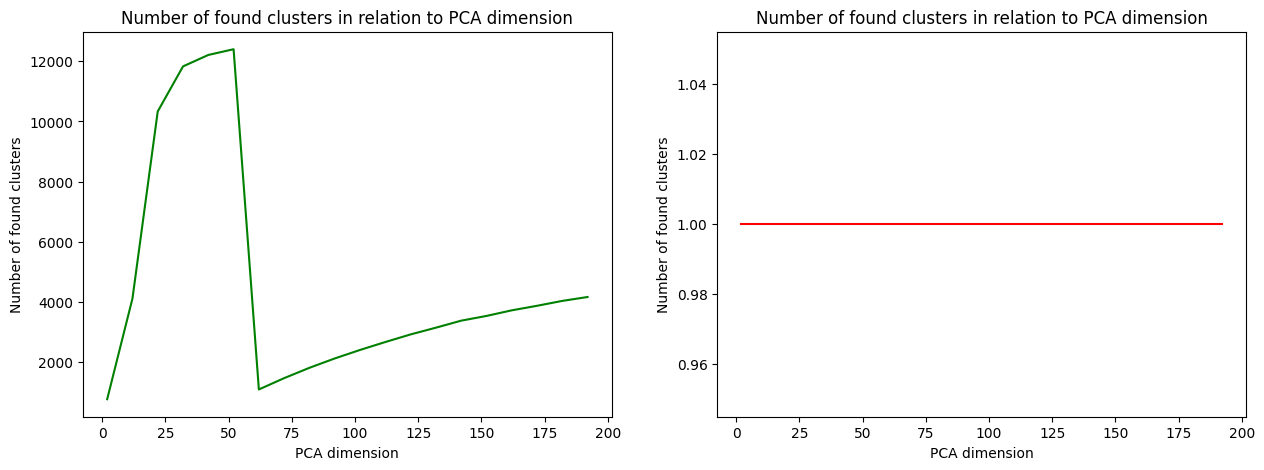

In [30]:
# Plot 'Number of found clusters vs PCA dimension'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(best_df['PCA'], best_df['n_clusters'], color = 'green')
ax[0].set_xlabel("PCA dimension") 
ax[0].set_ylabel("Number of found clusters")  
ax[0].set_title("Number of found clusters in relation to PCA dimension")  
ax[1].plot(worst_df['PCA'], worst_df['n_clusters'], color = 'red')
ax[1].set_xlabel("PCA dimension")  
ax[1].set_ylabel("Number of found clusters")  
ax[1].set_title("Number of found clusters in relation to PCA dimension")  
plt.show()

In [31]:
# Retrieving the best and the worst configuration based on the rand index among all configurations
best_model = best_df.iloc[best_df['rand_index'].idxmax()]
best_model.to_latex('./latex/MeanShift/best_model_ms.tex', index=False)
worst_model = worst_df.iloc[worst_df['rand_index'].idxmin()]
worst_model.to_latex('./latex/MeanShift/worst_model_ms.tex', index=False)

In [32]:
# Best model
best_model

PCA              152.000000
width              5.000000
n_clusters      3524.000000
rand_index         0.908042
fit_time         175.233334
predict_time       0.560470
Name: 15, dtype: float64

In [33]:
# Worst model
worst_model

PCA              2.000000
width            5.000000
n_clusters       1.000000
rand_index       0.100227
fit_time        12.279422
predict_time     0.000000
Name: 0, dtype: float64